In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

#Creating lists with the data

pap = [0.05,0.06,0.11,0.22,0.02,0.17,0.04,0.07,0.08,0.07,0.14,0.18,0.08,0.14,0.16,0.08,0.16,0.14,0.09,0.19]
ech = [4,4.7,7.9,15.5,1.5,11.8,3,5.3,6.6,5.6,10,13.3,6.3,9.9,11.1,6.2,11.1,11.3,6.6,13.5]
cot = [1.19, 0.94,0.7,0.35,0.42,0.31,0.25,0.26,None, 0.32,0.24,0.27,0.3,0.26,0.24,0.24,0.29,0.29,0.28,0.22]
gra = [0.3,0.29,0.18,0.23,0.28,0.3,0.32,0.33,0.24, 0.30,0.31,0.18,0.28,0.3,0.097,0.1,0.1,0.11,0.12,0.13]
amostras = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18, 19 ,20]
shc = [13.22,16.40,12.18,18.97,4.37,15.97,9.36,15.23,9.93,11.27,31.50,20.08,14.77,23.60,11.47,25.50,14.16,14.23,21.80,10.76]

#Bulding a DataFrame with the lists
df = pd.DataFrame(list(zip(amostras,cot, gra,ech, pap, shc)), columns = ["amo", "cot", "gra","ech","pap", "shc"])
x = df.shc
y = df.pap
len(df.pap)

20

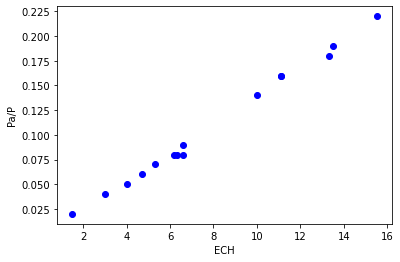

In [16]:
#Creating training and test masks


msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

plt.scatter(train.ech, train.pap, color = 'blue')
plt.ylabel("Pa/P")
plt.xlabel("ECH")
plt.show()


In [21]:
# Determine coefficients and Intercept
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ech']])
train_y = np.asanyarray(train[['pap']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.01455349]]
Intercept:  [-0.00716662]


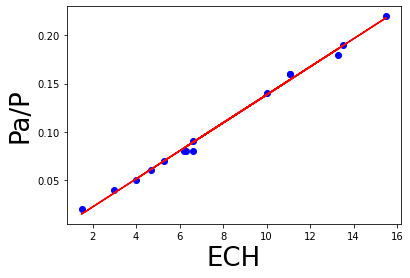

In [22]:
#Train
plt.scatter(train.ech, train.pap,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("ECH",fontsize=26)
plt.ylabel("Pa/P",fontsize=26)
plt.show()

In [23]:
#Evaluation
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ech']])
test_y = np.asanyarray(test[['pap']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 0.01
Residual sum of squares (MSE): 0.00
R2-score: 0.94


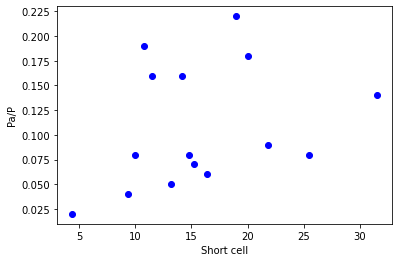

In [24]:
# Same thing using the Short Cell values
plt.scatter(train.shc, train.pap, color = 'blue')
plt.ylabel("Pa/P")
plt.xlabel("Short cell")
plt.show()


In [25]:
# Determine coefficients and Intercept
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['shc']])
train_y = np.asanyarray(train[['pap']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.00276228]]
Intercept:  [0.06426026]


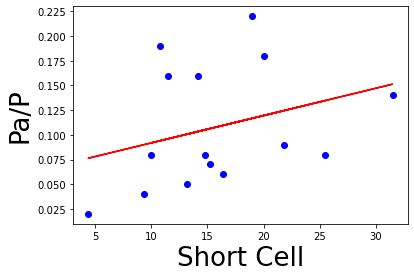

In [27]:
#Train
plt.scatter(train.shc, train.pap,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Short Cell",fontsize=26)
plt.ylabel("Pa/P",fontsize=26)
plt.show()

In [28]:
#Evaluation
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['shc']])
test_y = np.asanyarray(test[['pap']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: -0.05
